## Long-Term High School to Higher Education Trend Analysis (2018-2022) using K-Means Methodology


In [50]:
from pyspark.sql import SparkSession

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("AnalisisKesehatan").getOrCreate()

# Load dataset
file_path = "SMA25tahun.csv"  # Ganti dengan path dataset Anda
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [51]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Pilih fitur yang akan digunakan untuk analisis
feature_columns = ["persentasi"]

In [53]:
# Gabungkan fitur menjadi vektor
vec_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = vec_assembler.transform(df)

In [54]:
# Pilih jumlah klaster yang diinginkan
num_clusters = 3

In [55]:
# Inisialisasi model KMeans
kmeans = KMeans().setK(num_clusters).setSeed(1)

In [56]:
# Latih model KMeans
model = kmeans.fit(df)

In [57]:
# Prediksi klaster untuk setiap data
df = model.transform(df)

In [58]:
# Konversi dataframe PySpark ke Pandas untuk visualisasi
df_pd = df.toPandas()

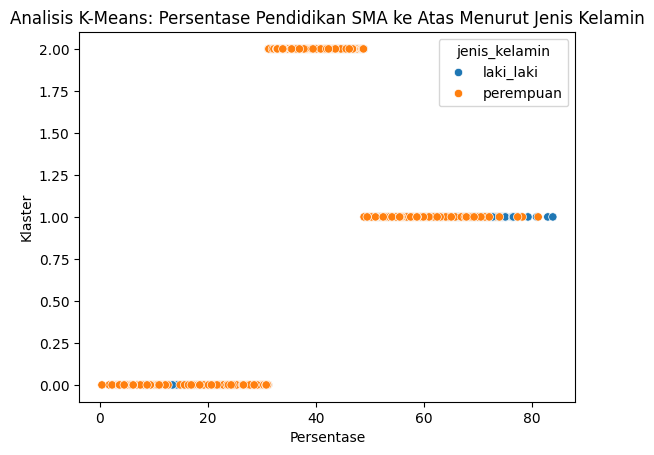

In [59]:
# Visualisasi menggunakan scatter plot
sns.scatterplot(x="persentasi", y="prediction", hue="jenis_kelamin", data=df_pd)
plt.title("Analisis K-Means: Persentase Pendidikan SMA ke Atas Menurut Jenis Kelamin")
plt.xlabel("Persentase")
plt.ylabel("Klaster")
plt.show()

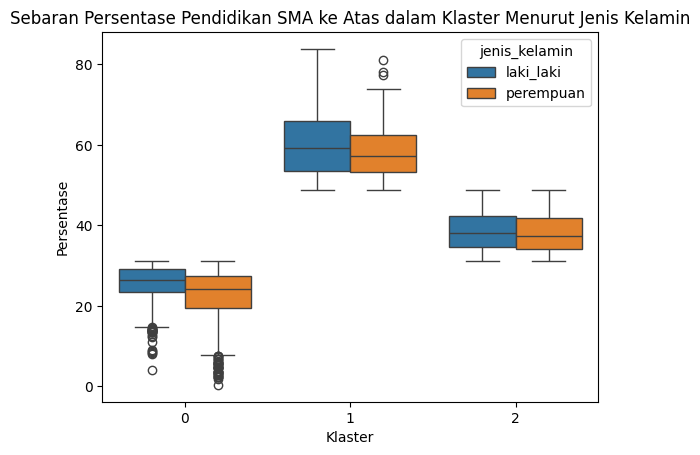

In [60]:
# Visualisasi menggunakan box plot untuk melihat sebaran persentase dalam setiap klaster
sns.boxplot(x="prediction", y="persentasi", hue="jenis_kelamin", data=df_pd)
plt.title("Sebaran Persentase Pendidikan SMA ke Atas dalam Klaster Menurut Jenis Kelamin")
plt.xlabel("Klaster")
plt.ylabel("Persentase")
plt.show()

In [61]:
# Statistik deskriptif untuk setiap klaster
cluster_stats = df.groupBy("prediction").agg({"persentasi": "mean", "persentasi": "stddev"}).orderBy("prediction")

In [62]:
# Tampilkan statistik deskriptif
cluster_stats.show()

+----------+------------------+
|prediction|stddev(persentasi)|
+----------+------------------+
|         0|   5.6796727363004|
|         1| 7.018054735475812|
|         2| 4.825093620728563|
+----------+------------------+



In [63]:
# Statistik deskriptif tambahan untuk setiap klaster
cluster_stats_detail = df.groupBy("prediction", "jenis_kelamin").agg({"persentasi": "mean", "persentasi": "stddev"}).orderBy("prediction")


In [64]:
# Tampilkan statistik deskriptif tambahan
cluster_stats_detail.show()

+----------+-------------+------------------+
|prediction|jenis_kelamin|stddev(persentasi)|
+----------+-------------+------------------+
|         0|    perempuan|6.0593560105133415|
|         0|    laki_laki| 4.490635088607813|
|         1|    perempuan| 6.183727802947141|
|         1|    laki_laki| 7.432771927392858|
|         2|    perempuan| 4.868321078017845|
|         2|    laki_laki| 4.784721833232083|
+----------+-------------+------------------+



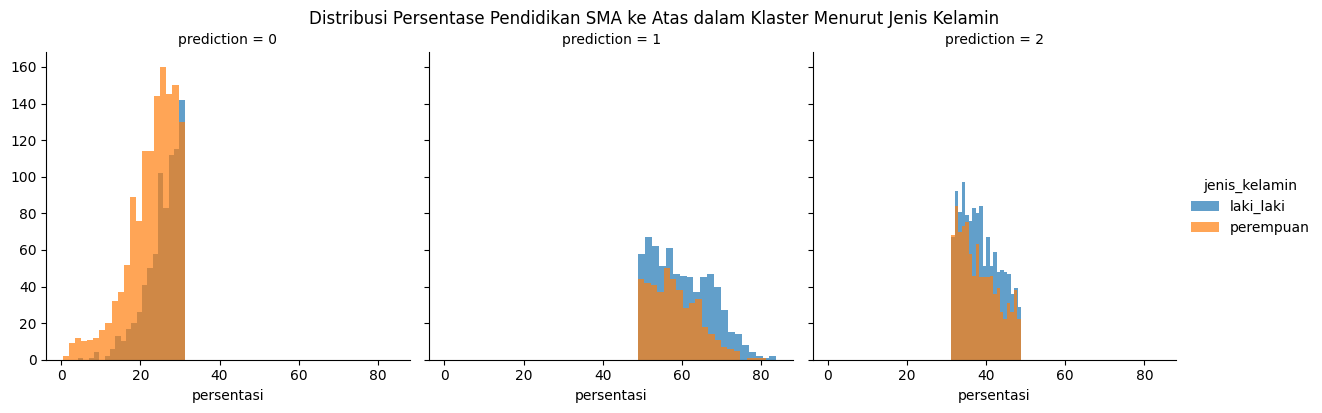

In [65]:
# Visualisasi histogram untuk melihat distribusi persentase pendidikan SMA ke atas dalam setiap klaster
g = sns.FacetGrid(df_pd, col="prediction", hue="jenis_kelamin", col_wrap=3, height=4)
g.map(plt.hist, "persentasi", bins=20, alpha=0.7)
g.add_legend()
plt.suptitle("Distribusi Persentase Pendidikan SMA ke Atas dalam Klaster Menurut Jenis Kelamin", y=1.02)
plt.show()

In [66]:
# Konversi kolom tahun menjadi format timestamp
from pyspark.sql.functions import col, to_date

df = df.withColumn("nama_tahun", to_date(col("nama_tahun"), 'yyyy'))

In [67]:
# Statistik deskriptif untuk setiap klaster dan tahun
cluster_year_stats = df.groupBy("prediction", "nama_tahun").agg({"persentasi": "mean", "persentasi": "stddev"}).orderBy("prediction", "nama_tahun")


In [68]:
# Tampilkan statistik deskriptif untuk setiap klaster dan tahun
cluster_year_stats.show()

+----------+----------+------------------+
|prediction|nama_tahun|stddev(persentasi)|
+----------+----------+------------------+
|         0|2018-01-01| 6.047917435198482|
|         0|2019-01-01| 5.889582729271832|
|         0|2020-01-01|5.3996001065820876|
|         0|2021-01-01| 5.513971745517396|
|         0|2022-01-01| 5.098022115196008|
|         1|2018-01-01|6.5147850198640915|
|         1|2019-01-01| 7.237504177208004|
|         1|2020-01-01| 6.653735691218713|
|         1|2021-01-01| 7.096818426982313|
|         1|2022-01-01| 7.353080827262011|
|         2|2018-01-01| 4.886179086014558|
|         2|2019-01-01|  4.70149132318723|
|         2|2020-01-01| 4.787037350662963|
|         2|2021-01-01| 4.962729197408835|
|         2|2022-01-01| 4.793755908263133|
+----------+----------+------------------+



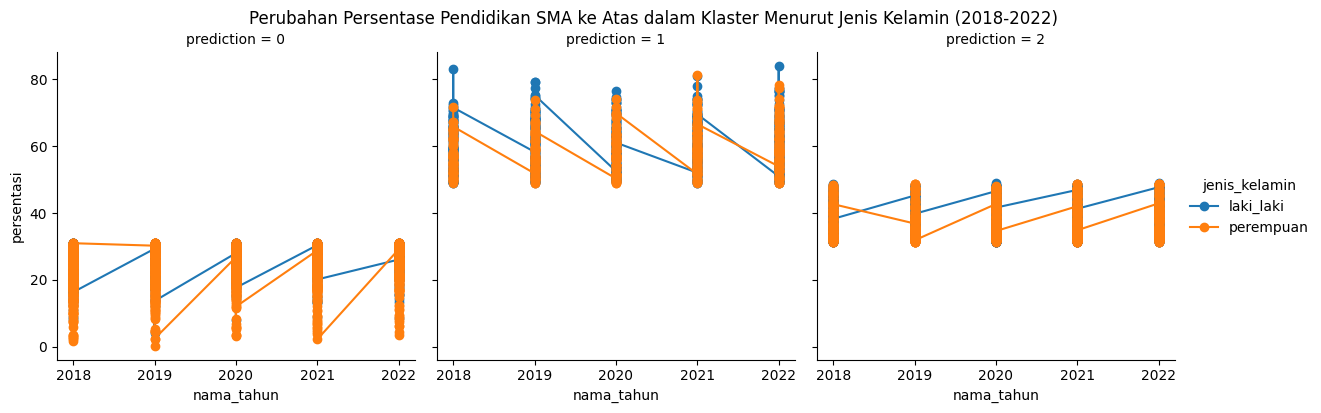

In [69]:
# Visualisasi perubahan persentase dari tahun ke tahun dalam setiap klaster
g = sns.FacetGrid(df_pd, col="prediction", hue="jenis_kelamin", col_wrap=3, height=4)
g.map(plt.plot, "nama_tahun", "persentasi", marker="o", linestyle="-")
g.add_legend()
plt.suptitle("Perubahan Persentase Pendidikan SMA ke Atas dalam Klaster Menurut Jenis Kelamin (2018-2022)", y=1.02)
plt.show()

In [70]:
# Hitung korelasi antara variabel-variabel
correlation_matrix = df.select("persentasi", "prediction").toPandas().corr()


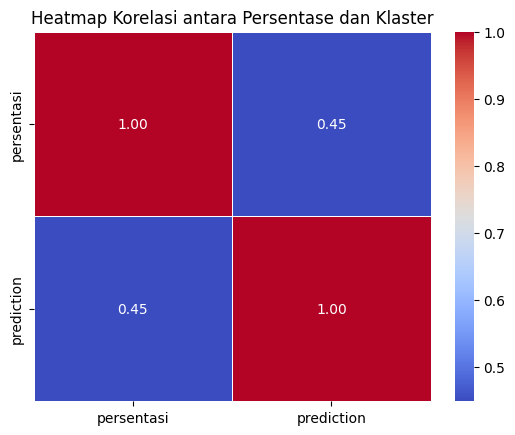

In [71]:
# Visualisasi heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Heatmap Korelasi antara Persentase dan Klaster")
plt.show()

In [72]:
# Perbandingan rata-rata persentase antara klaster dan jenis kelamin
cluster_gender_comparison = df.groupBy("prediction", "jenis_kelamin").agg({"persentasi": "mean"}).orderBy("prediction")

In [73]:
# Tampilkan perbandingan rata-rata persentase
cluster_gender_comparison.show()

+----------+-------------+------------------+
|prediction|jenis_kelamin|   avg(persentasi)|
+----------+-------------+------------------+
|         0|    perempuan| 22.90598501872658|
|         0|    laki_laki| 25.65347447073476|
|         1|    perempuan|58.199491150442455|
|         1|    laki_laki| 60.07407952871874|
|         2|    perempuan| 38.21345511482265|
|         2|    laki_laki| 38.66665083135395|
+----------+-------------+------------------+



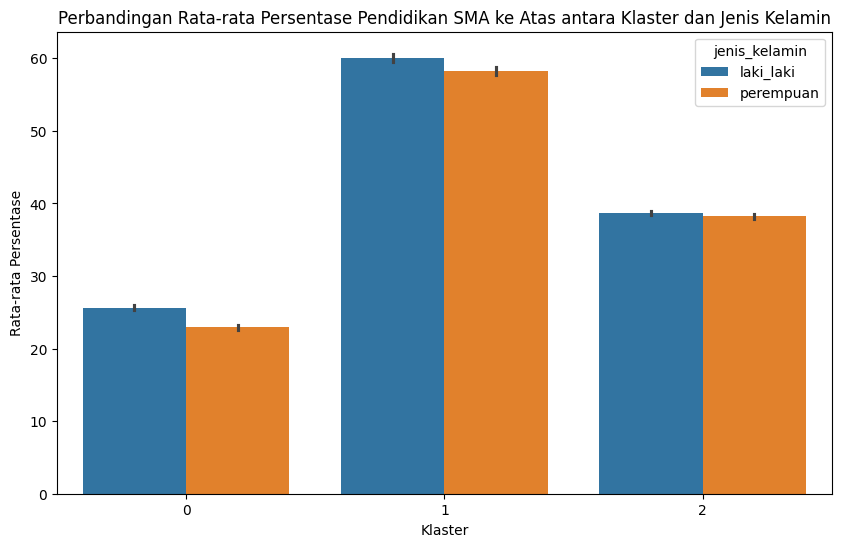

In [74]:
# Visualisasi perbandingan rata-rata persentase antara klaster dan jenis kelamin
plt.figure(figsize=(10, 6))
sns.barplot(x="prediction", y="persentasi", hue="jenis_kelamin", data=df_pd)
plt.title("Perbandingan Rata-rata Persentase Pendidikan SMA ke Atas antara Klaster dan Jenis Kelamin")
plt.xlabel("Klaster")
plt.ylabel("Rata-rata Persentase")
plt.show()

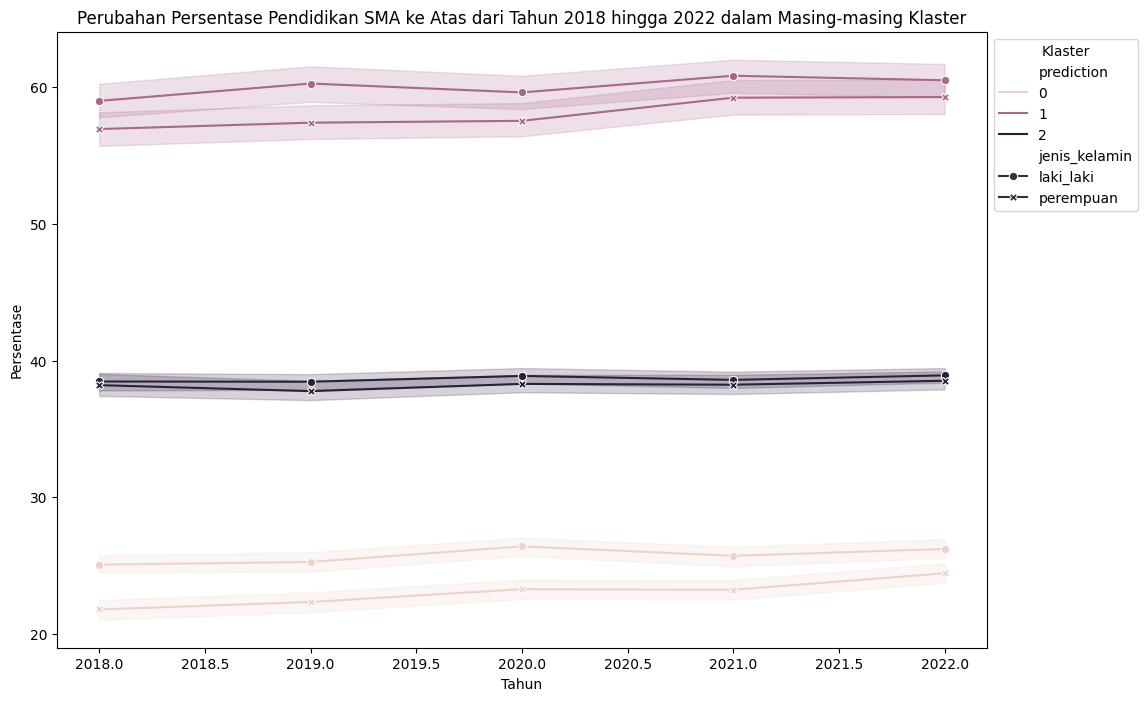

In [75]:
# Visualisasi trendline perubahan persentase dari tahun 2018 hingga 2022 dalam masing-masing klaster
plt.figure(figsize=(12, 8))
sns.lineplot(x="nama_tahun", y="persentasi", hue="prediction", style="jenis_kelamin", data=df_pd, markers=True, dashes=False)
plt.title("Perubahan Persentase Pendidikan SMA ke Atas dari Tahun 2018 hingga 2022 dalam Masing-masing Klaster")
plt.xlabel("Tahun")
plt.ylabel("Persentase")
plt.legend(title="Klaster", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [76]:
# Evaluasi kualitas klaster menggunakan metrik internal K-Means
from pyspark.ml.evaluation import ClusteringEvaluator

In [77]:
# Evaluasi model
evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(df)
print(f"Silhouette Score: {silhouette_score}")

Silhouette Score: 0.7032226180520462


In [78]:
from pyspark.sql.functions import col
from pyspark.sql import functions as F

In [79]:
# Analisis distribusi persentase dalam setiap klaster dan jenis kelamin
df.groupBy("prediction", "jenis_kelamin").agg(F.expr("percentile_approx(persentasi, 0.25)").alias("Q1"),
                                                F.expr("percentile_approx(persentasi, 0.5)").alias("Median"),
                                                F.expr("percentile_approx(persentasi, 0.75)").alias("Q3")).show()


+----------+-------------+-----+------+-----+
|prediction|jenis_kelamin|   Q1|Median|   Q3|
+----------+-------------+-----+------+-----+
|         2|    perempuan|34.04| 37.45|41.78|
|         0|    perempuan|19.56| 24.13|27.53|
|         1|    perempuan|53.23| 57.28|62.37|
|         0|    laki_laki|23.34| 26.54|29.08|
|         1|    laki_laki| 53.6| 59.13|65.83|
|         2|    laki_laki|34.59| 38.07|42.49|
+----------+-------------+-----+------+-----+



In [80]:
# Uji statistik (misalnya, uji t) untuk mengidentifikasi perbedaan signifikan antara klaster dan jenis kelamin
from pyspark.sql import Window
from pyspark.sql.functions import rank

windowSpec = Window().partitionBy("prediction").orderBy(col("persentasi").desc())


In [81]:
# Ranking untuk masing-masing klaster
df = df.withColumn("rank", rank().over(windowSpec))

In [82]:
# Filter data hanya untuk rank teratas dalam masing-masing klaster
df_top_ranked = df.filter(col("rank") == 1)

In [83]:
# Tampilkan data hasil filter
df_top_ranked.show()

+---------------+----------+-------------+----------+--------+----------+----+
|   nama_wilayah|nama_tahun|jenis_kelamin|persentasi|features|prediction|rank|
+---------------+----------+-------------+----------+--------+----------+----+
|        Cirebon|2020-01-01|    laki_laki|      31.2|  [31.2]|         0|   1|
|Kota Banda Aceh|2022-01-01|    laki_laki|     83.85| [83.85]|         1|   1|
|        Malinau|2022-01-01|    laki_laki|     48.88| [48.88]|         2|   1|
+---------------+----------+-------------+----------+--------+----------+----+



In [84]:
spark.stop()